<div style="text-align:center;"><span style="font-size: 2em; font-weight:bold">Prueba técnica Data Science IT Academy<br>
Algoritmos de Aprendizaje Supervisado: Clasificación<br>
Predicción sobre el turno en el que se producen acidentes de transito en Barcelona</span></div>

# Analisis y limpieza de datos

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [75]:
# Lista de nombres de archivos CSV
archivos = ['2023_accidents_causa_conductor_gu_bcn_.csv', '2022_accidents_causa_conductor_gu_bcn_.csv', 
            '2021_accidents_causa_conductor_gu_bcn_.csv']

# Lista para almacenar los DataFrames
dfs = []

# Leer cada archivo CSV y almacenar los DataFrames resultantes en la lista 'dfs'
for archivo in archivos:
    df = pd.read_csv(archivo, sep=',')
    dfs.append(df)

# Concatenar todos los DataFrames en uno solo
df = pd.concat(dfs, ignore_index=True)

# Mostrar información sobre el DataFrame resultante
df

,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,NK_Any,...,Dia_mes,Hora_dia,Descripcio_torn,Descripcio_causa_mediata,Coordenada_UTM_X_ED50,Coordenada_UTM_Y_ED50,Longitud_WGS84,Latitud_WGS84,Longitud,Latitud
0,2023S000699,-1,Desconegut,-1,Desconegut,-1,Rovira (ascendent) ...,0,Dissabte,2023,...,4,16,Tarda,Manca d'atenció a la conducció,430443.36,4585232.00,2.166596,41.413783,NaN,NaN
1,2023S005197,-1,Desconegut,-1,Desconegut,-1,Estatut de Catalunya ...,11,Divendres,2023,...,1,13,Matí,No respectar distàncies,429493.73,4587108.15,2.155015,41.430598,NaN,NaN
2,2023S007430,-1,Desconegut,-1,Desconegut,-1,Rovira (ascendent) ...,0,Divendres,2023,...,15,11,Matí,No respectar distàncies,430443.36,4585232.00,2.166596,41.413783,NaN,NaN
3,2023S000961,-1,Desconegut,-1,Desconegut,-1,Amílcar ...,120,Dissabte,2023,...,28,14,Tarda,No respectat pas de vianants,430955.45,4586335.10,2.172596,41.423762,NaN,NaN
4,2023S006486,-1,Desconegut,-1,Desconegut,-1,Augusta / Hort de la Vila ...,NaN,Dijous,2023,...,2,14,Tarda,Desobeir semàfor,426883.33,4583690.92,2.124189,41.399587,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27191,2021S000531,8,Nou Barris,45,Porta,242000,Ciutat de Mallorca,0024 0024,Dimarts,2021,...,2,16,Tarda,Desobeir semàfor,431470.52,4587354.60,NaN,NaN,2.178644,41.432989
27192,2021S004840,8,Nou Barris,44,Vilapicina i la Torre Llobeta,119003,Fabra i Puig,0181 0181,Divendres,2021,...,3,0,Nit,Desobeir altres senyals,431371.64,4587040.12,NaN,NaN,2.177496,41.430148
27193,2021S004824,8,Nou Barris,45,Porta,256401,Pintor Alsamora,0001 0001,Dijous,2021,...,2,8,Matí,Manca d'atenció a la conducció,431781.49,4587486.66,NaN,NaN,2.182351,41.434205
27194,2021S005061,8,Nou Barris,44,Vilapicina i la Torre Llobeta,266100,Prat d'en Roquer,0009 0013,Dilluns,2021,...,13,13,Matí,Manca d'atenció a la conducció,431325.36,4586527.80,NaN,NaN,2.177001,41.425530


## Detalle de las columna

- Numero_expediente: Número de expediente
- Codi_districte: Código de distrito
- Nom_districte: Nombre del distrito
- Codi_barri: Código de barrio
- Nom_barri: Nombre del barrio
- Codi_carrer: Código de calle
- Nom_carrer: Nombre de la calle
- Num_postal: Número postal
- Descripción_dia_semana: Nombre del día de la semana
- NK_Any: Año
- Mes_any: Mes del año
- Nom_mes: Nombre del mes
- Dia_mes: Día del mes
- Hora_dia: Hora del día
- Descripción_torn: Descripción del turno
- Descripción_causa_mediata: Descripción de la causa mediata
- Coordenada_UTM_X_ED50: Coordenada X en formato UTM (ED50)
- Coordenada_UTM_Y_ED50: Coordenada Y en formato UTM (ED50)
- Longitud_WGS84: Longitud
- Latitud_WGS84: Latitud

## Seleccion de los datos

In [63]:
df.columns

Index(['Numero_expedient', 'Codi_districte', 'Nom_districte', 'Codi_barri',
       'Nom_barri', 'Codi_carrer', 'Nom_carrer', 'Num_postal ',
       'Descripcio_dia_setmana', 'NK_Any', 'Mes_any', 'Nom_mes', 'Dia_mes',
       'Hora_dia', 'Descripcio_torn', 'Descripcio_causa_mediata',
       'Coordenada_UTM_X_ED50', 'Coordenada_UTM_Y_ED50', 'Longitud_WGS84',
       'Latitud_WGS84', 'Longitud', 'Latitud'],
      dtype='object')

Borrado de columna: se decide mantener ditricto, mes dia y turno.

In [64]:
#Borrar datos que no se utilizarán para el modelo
df = df.drop(['Numero_expedient','Codi_barri',
       'Nom_barri', 'Codi_carrer', 'Nom_carrer', 'Num_postal ',
       'NK_Any', 'Mes_any', 'Dia_mes','Hora_dia', 'Descripcio_causa_mediata','Coordenada_UTM_X_ED50', 'Coordenada_UTM_Y_ED50', 'Longitud_WGS84',
       'Latitud_WGS84', 'Longitud', 'Latitud'], axis=1)
df.head()

,Codi_districte,Nom_districte,Descripcio_dia_setmana,Nom_mes,Descripcio_torn
0,-1,Desconegut,Dissabte,Febrer,Tarda
1,-1,Desconegut,Divendres,Setembre,Matí
2,-1,Desconegut,Divendres,Desembre,Matí
3,-1,Desconegut,Dissabte,Gener,Tarda
4,-1,Desconegut,Dijous,Novembre,Tarda


In [66]:
# Calcular el total de filas en el campo 'Nom_Districte'
total_filas = df['Nom_districte'].count()

# Contar el número de veces que aparece 'Desconegut' en 'Nom_Districte'
num_desconegut = df[df['Nom_districte'] == 'Desconegut']['Nom_districte'].count()

# Calcular el porcentaje
porcentaje_desconegut = (num_desconegut / total_filas) * 100

print(f"El porcentaje de 'Desconegut' en 'Nom_Districte' es: {porcentaje_desconegut:.2f}%")

El porcentaje de 'Desconegut' en 'Nom_Districte' es: 0.86%


Se borra los datos en los que se desconoce el districto, por considerarse nulos y porque no son un porcentaje importante de la muestra

In [5]:
#Borrar los accidentes donde no se conoce el districto
df = df[df['Nom_districte'] != 'Desconegut']

df.head()

,Codi_districte,Nom_districte,Descripcio_dia_setmana,Nom_mes,Descripcio_torn
13,10,Sant Martí,Dimarts,Agost,Nit
14,10,Sant Martí,Dimarts,Juny,Tarda
15,10,Sant Martí,Dimecres,Juny,Tarda
16,10,Sant Martí,Dimarts,Setembre,Matí
17,10,Sant Martí,Dilluns,Maig,Matí


## Análisis preliminar de los datos

In [6]:
df.nunique()

Codi_districte            10
Nom_districte             10
Descripcio_dia_setmana     7
Nom_mes                   12
Descripcio_torn            3
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26962 entries, 13 to 27195
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Codi_districte          26962 non-null  int64 
 1   Nom_districte           26962 non-null  object
 2   Descripcio_dia_setmana  26962 non-null  object
 3   Nom_mes                 26962 non-null  object
 4   Descripcio_torn         26962 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.2+ MB


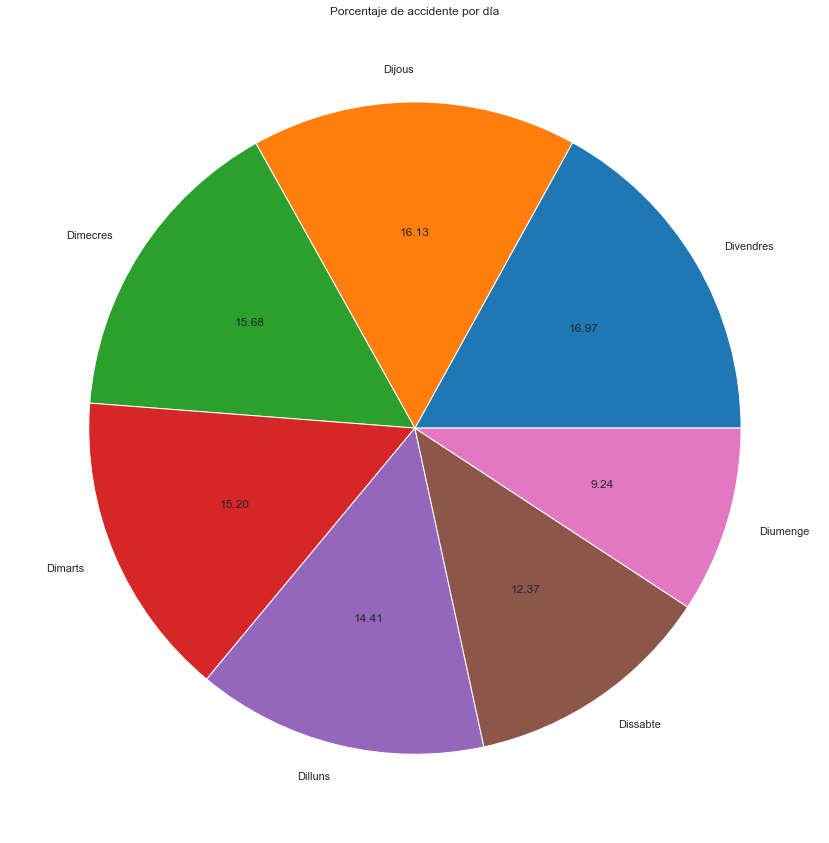

In [67]:
# cuanta de cada causa del accidentes
causas = df['Descripcio_dia_setmana'].value_counts()

# Obtener las etiquetas y colores correspondientes
labels = causas.index
colors = plt.cm.tab10.colors[:len(labels)]

# Graficar el conteo de 'Descripcio_causa_mediata' sin etiquetas
plot = causas.plot(kind='pie', autopct='%.2f', figsize=(15, 15), colors=colors)

plot.set_ylabel('')  # Establecer el eje y en blanco

plt.title('Porcentaje de accidente por día')
plt.show()


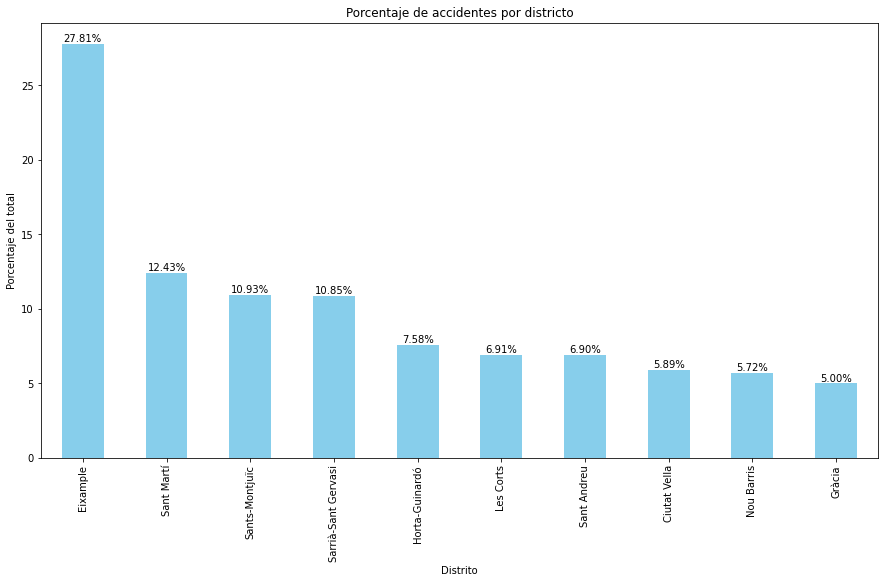

In [9]:
# Obtener los valores únicos y sus conteos por distrito
districto = df['Nom_districte'].value_counts()

# Calcular los porcentajes del total
porcentajes = districto / districto.sum() * 100

# Graficar los porcentajes del total como un gráfico de barras
porcentajes.plot(kind='bar', figsize=(15, 8), color='skyblue')

plt.xlabel('Distrito')
plt.ylabel('Porcentaje del total')
plt.title('Porcentaje de accidentes por districto')

# Agregar etiquetas de porcentaje encima de cada barra
for i, porcentaje in enumerate(porcentajes):
    plt.text(i, porcentaje, f'{porcentaje:.2f}%', ha='center', va='bottom')

plt.show()


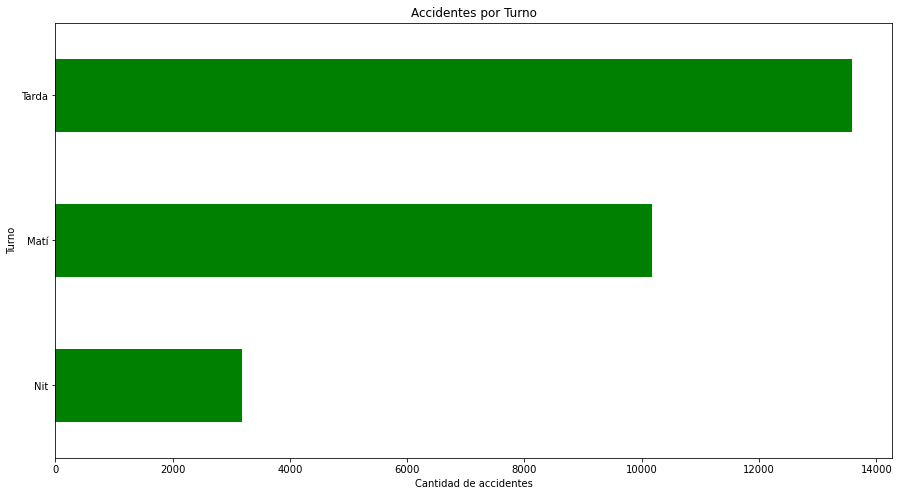

In [10]:
# Obtener los valores únicos y sus conteos
turno = df['Descripcio_torn'].value_counts()

# Ordenar los datos por el recuento de accidentes en orden ascendente
turno = turno.sort_values(ascending=True)

# Graficar el conteo de 'Nombre del districto' como un gráfico de barras
turno.plot(kind='barh', figsize=(15, 8), color='green')

plt.xlabel('Cantidad de accidentes')
plt.ylabel('Turno')
plt.title('Accidentes por Turno')

plt.show()

In [11]:
# Calcular el recuento de accidentes por mes
mes = df['Nom_mes'].value_counts()

# Calcular los porcentajes para cada mes
porcentajes = mes / mes.sum() * 100

# Crear un DataFrame con los porcentajes y sus correspondientes nombres de mes
mes = pd.DataFrame({'Mes': porcentajes.index, 'Porcentaje': porcentajes.values})

# Formatear los porcentajes con dos decimales y el símbolo %
mes['Porcentaje'] = mes['Porcentaje'].apply(lambda x: '{:.2f}%'.format(x))

print(mes.rename_axis('Porcentaje de accidentes por mes').to_string(index=False))


     Mes Porcentaje
 Octubre      9.39%
    Juny      9.18%
Novembre      9.14%
    Maig      9.01%
  Juliol      8.95%
Desembre      8.47%
    Març      8.30%
   Abril      8.09%
Setembre      8.03%
  Febrer      7.60%
   Gener      7.18%
   Agost      6.66%


# Aplicación del modelo predictivo


## Preparación de los datos

A partir de los datos, se crean columnas que sean numéricas para procesarlas.

In [12]:
# Definir un diccionario que mapee cada día de la semana a su número correspondiente, comenzando desde el domingo
dias_dict = {
    'Diumenge': 1,
    'Dilluns': 2,
    'Dimarts': 3,
    'Dimecres': 4,
    'Dijous': 5,
    'Divendres': 6,
    'Dissabte': 7
}

# Crear una nueva columna 'Dia_Numero' asignando el número correspondiente a cada día de la semana
df['Dia_Numero'] = df['Descripcio_dia_setmana'].map(dias_dict)

# Definir un diccionario que mapee cada turno del día a su número correspondiente
turno_dict = {
    'Matí': 0,
    'Tarda': 1,
    'Nit': 2,
}

# Crear una nueva columna 'Turno_Numero' asignando el número correspondiente a cada turno del día
df['Turno_Numero'] = df['Descripcio_torn'].map(turno_dict)

# Definir un diccionario que mapee cada mes a su trimestre correspondiente 
mes_dict = {
    'Gener': 1,
    'Febrer': 2,
    'Març': 3,
    'Abril': 4,
    'Maig': 5,
    'Juny': 6,
    'Juliol': 7,
    'Agost': 8,
    'Setembre': 9,
    'Octubre': 10,
    'Novembre': 11,
    'Desembre': 12
}

# Crear una nueva columna 'Mes_Numero' asignando el número correspondiente a cada mes
df['Mes_Numero'] = df['Nom_mes'].map(mes_dict)


df

,Codi_districte,Nom_districte,Descripcio_dia_setmana,Nom_mes,Descripcio_torn,Dia_Numero,Turno_Numero,Mes_Numero
13,10,Sant Martí,Dimarts,Agost,Nit,3,2,8
14,10,Sant Martí,Dimarts,Juny,Tarda,3,1,6
15,10,Sant Martí,Dimecres,Juny,Tarda,4,1,6
16,10,Sant Martí,Dimarts,Setembre,Matí,3,0,9
17,10,Sant Martí,Dilluns,Maig,Matí,2,0,5
...,...,...,...,...,...,...,...,...
27191,8,Nou Barris,Dimarts,Febrer,Tarda,3,1,2
27192,8,Nou Barris,Divendres,Setembre,Nit,6,2,9
27193,8,Nou Barris,Dijous,Setembre,Matí,5,0,9
27194,8,Nou Barris,Dilluns,Setembre,Matí,2,0,9


Se crea un nuevo Data Frame solo con los campos numéricos, sobre el cual se aplicará el modelo

In [15]:
colum_num = ['Turno_Numero','Codi_districte', 'Mes_Numero', 'Dia_Numero']
dfTran = df[colum_num].copy()

dfTran

,Turno_Numero,Codi_districte,Mes_Numero,Dia_Numero
13,2,10,8,3
14,1,10,6,3
15,1,10,6,4
16,0,10,9,3
17,0,10,5,2
...,...,...,...,...
27191,1,8,2,3
27192,2,8,9,6
27193,0,8,9,5
27194,0,8,9,2


## Preprocesado

In [16]:
dfTran = dfTran.astype('int64')
dfTran.dtypes

Turno_Numero      int64
Codi_districte    int64
Mes_Numero        int64
Dia_Numero        int64
dtype: object

Graficos de las distribución de las muestras

<Figure size 432x288 with 0 Axes>

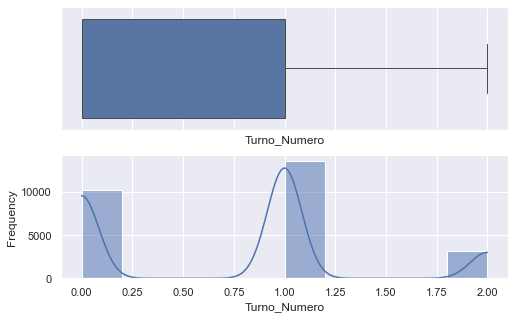

<Figure size 576x360 with 0 Axes>

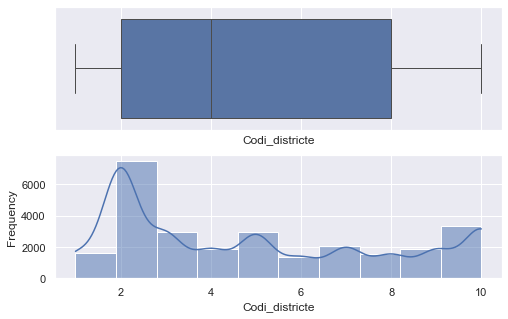

<Figure size 576x360 with 0 Axes>

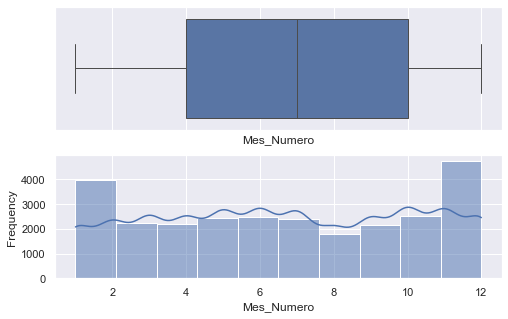

<Figure size 576x360 with 0 Axes>

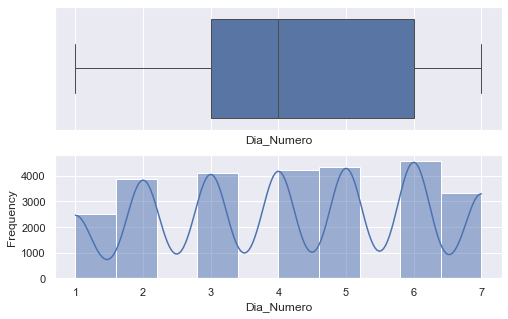

In [17]:
for i in dfTran.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i],  ax=ax_box , linewidth= 1.0)
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True)

Correlación de los datos de la muestra

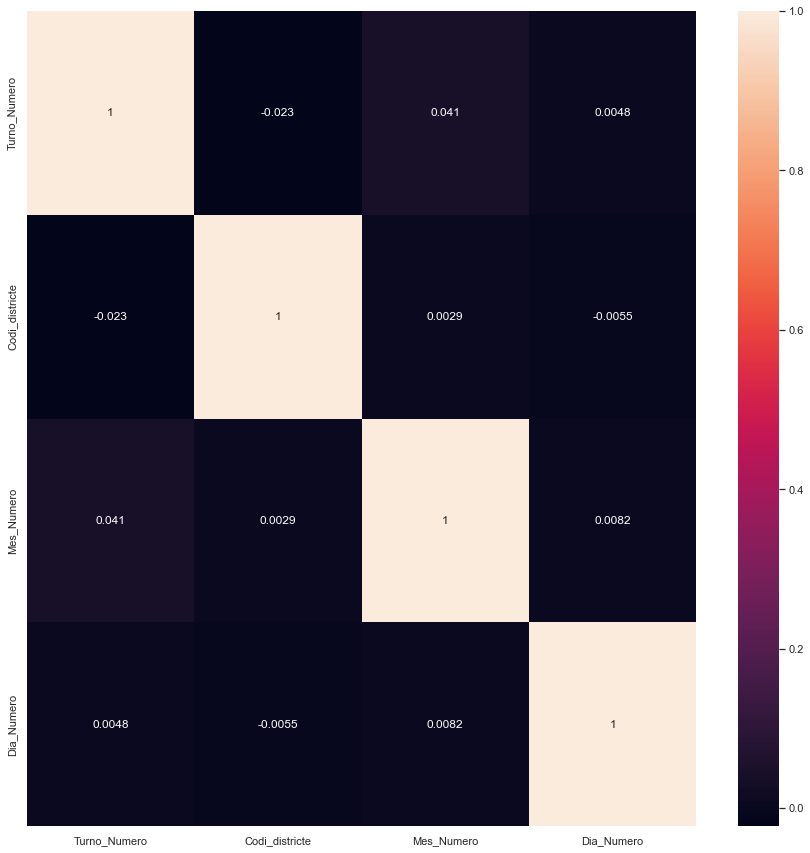

In [18]:
#Medir la correlación de las variables
plt.figure(figsize=(15, 15))
corr = dfTran.corr()
sns.heatmap(corr, annot=True)
plt.show()

Medición de p-value

In [19]:
from scipy import stats


for i in dfTran:
    shapiro_test = stats.shapiro(dfTran[i])
    print('Para la variable ', i, "con un p-value de ", shapiro_test.pvalue)
    if shapiro_test.pvalue>0.05:
        print('Probablemente Gaussiana\n')
    else:
        print("Probablemente no Gaussiana\n")

Para la variable  Turno_Numero con un p-value de  0.0
Probablemente no Gaussiana

Para la variable  Codi_districte con un p-value de  0.0
Probablemente no Gaussiana

Para la variable  Mes_Numero con un p-value de  0.0
Probablemente no Gaussiana

Para la variable  Dia_Numero con un p-value de  0.0
Probablemente no Gaussiana



Normalizaci{on de los datos

In [20]:
#Normalización de los datos
from sklearn import preprocessing 

columnsN = ['Codi_districte', 'Mes_Numero', 'Dia_Numero']
scalerNorm = preprocessing.MinMaxScaler().fit(dfTran[columnsN])
dfTran[columnsN] = scalerNorm.transform(dfTran[columnsN])

dfTran.head()

,Turno_Numero,Codi_districte,Mes_Numero,Dia_Numero
13,2,1.0,0.636364,0.333333
14,1,1.0,0.454545,0.333333
15,1,1.0,0.454545,0.500000
16,0,1.0,0.727273,0.333333
17,0,1.0,0.363636,0.166667


Conversión de los datos a categóricos

In [21]:
# Convertir la columna 'Causa_Numero' a tipo de dato categórico
#dfTran['Causa_Numero'] = dfTran['Causa_Numero'].astype('category')
dfTran = dfTran.astype('category')

dfTran.dtypes

Turno_Numero      category
Codi_districte    category
Mes_Numero        category
Dia_Numero        category
dtype: object

# Modelo predictivo de clasificación

## División de Test y Train

In [22]:
X = dfTran.drop(['Turno_Numero'],axis=1)
y = dfTran[['Turno_Numero']]

y.head()

,Turno_Numero
13,2
14,1
15,1
16,0
17,0


In [23]:
X.head()

,Codi_districte,Mes_Numero,Dia_Numero
13,1.0,0.636364,0.333333
14,1.0,0.454545,0.333333
15,1.0,0.454545,0.500000
16,1.0,0.727273,0.333333
17,1.0,0.363636,0.166667


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = 0.7)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(18873, 3) (8089, 3) (18873, 1) (8089, 1)


In [31]:
dfTran['Turno_Numero'].value_counts()

1    13590
0    10182
2     3190
Name: Turno_Numero, dtype: int64

## Aplicación de modelos

In [25]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()

In [26]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver = 'lbfgs', random_state=42)

In [27]:
from sklearn.svm import SVC
SVC = SVC(kernel='linear')

In [28]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=42)

Entrenamiento de los modelos

In [29]:
KNN.fit(X_train, y_train)
LR.fit(X_train, y_train)
SVC.fit(X_train, y_train)
RF.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Predicción

In [30]:
y_pred_KNN = KNN.predict(X_test)
y_pred_LR = LR.predict(X_test)
y_pred_SVC = SVC.predict(X_test)
y_pred_RF = RF.predict(X_test)

## Resultados

In [37]:
#Accuracy
acc_KNN = KNN.score(X_test, y_test)
acc_LR = LR.score(X_test, y_test)
acc_SVC = SVC.score(X_test, y_test)
acc_RF = RF.score(X_test, y_test)


acc_KNN = "{:.2f}".format(acc_KNN)
acc_LR = "{:.2f}".format(acc_LR)
acc_SVC = "{:.2f}".format(acc_SVC)
acc_RF = "{:.2f}".format(acc_RF)


#F1
from sklearn.metrics import f1_score
f1_KNN = f1_score(y_test, y_pred_KNN, average='macro')
f1_LR = f1_score(y_test, y_pred_LR, average='macro')
f1_SVC = f1_score(y_test, y_pred_SVC, average='macro')
f1_RF = f1_score(y_test, y_pred_RF, average='macro')


f1_KNN = "{:.2f}".format(f1_KNN)
f1_LR = "{:.2f}".format(f1_LR)
f1_SVC = "{:.2f}".format(f1_SVC)
f1_RF = "{:.2f}".format(f1_RF)

#recall
from sklearn.metrics import recall_score

recall_KNN = recall_score(y_test, y_pred_KNN, average='macro')
recall_LR = recall_score(y_test, y_pred_LR, average='macro')
recall_SVC = recall_score(y_test, y_pred_SVC, average='macro')
recall_RF = recall_score(y_test, y_pred_RF, average='macro')


recall_KNN = "{:.2f}".format(recall_KNN)
recall_LR = "{:.2f}".format(recall_LR)
recall_SVC = "{:.2f}".format(recall_SVC)
recall_RF = "{:.2f}".format(recall_RF)
#cuadro de resultados
resultados = pd.DataFrame( data = [['KNN', acc_KNN, f1_KNN, recall_KNN],
                                [ 'LR', acc_LR, f1_LR, recall_LR],
                                ['SVC', acc_SVC,f1_SVC, recall_SVC],
                                ['RF', acc_RF, f1_RF, recall_RF]],
                       columns = ['Modelo', 'Accuracy', 'F1', 'Recall'])


resultados

,Modelo,Accuracy,F1,Recall
0,KNN,0.46,0.33,0.34
1,LR,0.51,0.23,0.33
2,SVC,0.51,0.23,0.33
3,RF,0.48,0.33,0.34


Matatrices de confusión de cada modelo

In [32]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

Text(0.5, 320.8, 'Predicción')

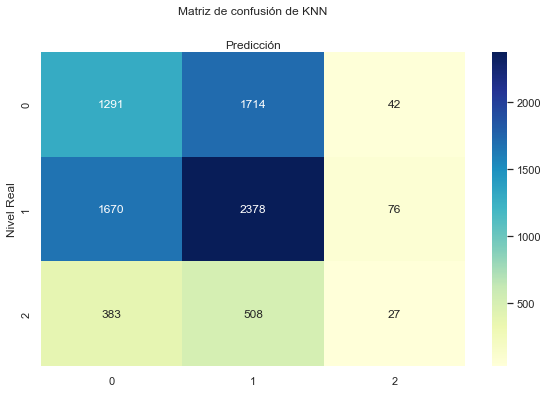

In [70]:
KNN_matrix = metrics.confusion_matrix(y_test, y_pred_KNN)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(KNN_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de confusión de KNN', y=1.1)
plt.ylabel('Nivel Real')
plt.xlabel('Predicción')

Text(0.5, 320.8, 'Predicción')

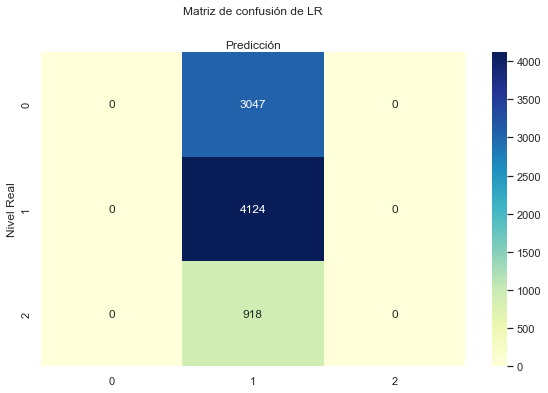

In [71]:
LR_matrix = metrics.confusion_matrix(y_test, y_pred_LR)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(LR_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de confusión de LR', y=1.1)
plt.ylabel('Nivel Real')
plt.xlabel('Predicción')

Text(0.5, 320.8, 'Predicción')

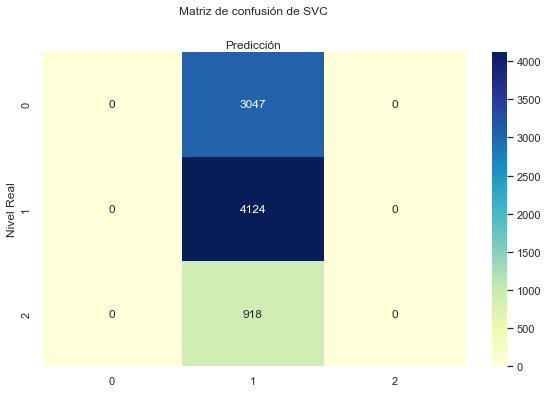

In [72]:
SVC_matrix = metrics.confusion_matrix(y_test, y_pred_SVC)


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(SVC_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de confusión de SVC', y=1.1)
plt.ylabel('Nivel Real')
plt.xlabel('Predicción')

Text(0.5, 320.8, 'Predicción')

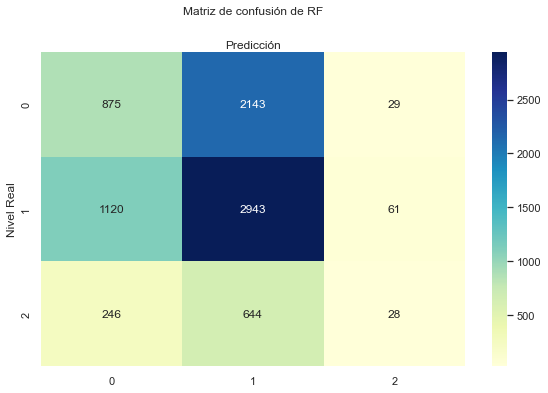

In [73]:
RF_matrix = metrics.confusion_matrix(y_test, y_pred_RF)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(RF_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de confusión de RF', y=1.1)
plt.ylabel('Nivel Real')
plt.xlabel('Predicción')

Cross Validation

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

#se reinicializan los modelos para evitar over fitting
KNN = KNeighborsClassifier()
LR = LogisticRegression(solver = 'lbfgs', random_state=42)
SVC = SVC(kernel='linear') 
RF = RandomForestClassifier(random_state=42)

cv_KNN = cross_val_score(KNN, X, y, cv=5, scoring='f1_macro')
cv_LR = cross_val_score(LR, X, y, cv=5, scoring='f1_macro')
cv_SVC = cross_val_score(SVC, X, y, cv=5, scoring='f1_macro')
cv_RF = cross_val_score(RF, X, y, cv=5, scoring='f1_macro')

cv_KNN = "{:.2f}".format(cv_KNN.mean())
cv_LR = "{:.2f}".format(cv_LR.mean())
cv_SVC = "{:.2f}".format(cv_SVC.mean())
cv_RF = "{:.2f}".format(cv_RF.mean())

cv = [cv_KNN, cv_LR, cv_SVC, cv_RF]
resultados['Cross Validation'] = cv

resultados

,Modelo,Accuracy,F1,Recall,Cross Validation
0,KNN,0.46,0.33,0.34,0.34
1,LR,0.51,0.23,0.33,0.22
2,SVC,0.51,0.23,0.33,0.22
3,RF,0.48,0.33,0.34,0.33


Se seleccionan los modelos de RF y KNN que, si bien tienen una accuracy un poco menor muestran en la matriz de confusión una distribución más correcta de las muestaras

## Mejora de parámetros

In [39]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]


random_grid = {'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap}

rf = RandomForestClassifier(random_state=42)

rf_random = RandomizedSearchCV(estimator = rf,
                                param_distributions = random_grid,
                                n_iter = 100, 
                                cv = 5, 
                                scoring='neg_mean_absolute_error', 
                                verbose=2, 
                                random_state=42, 
                                n_jobs = -1)


rf_random.fit(X,y.values.ravel())

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 288, 377, 466,
                                                         555, 644, 733, 822,
                                                         911, 1000]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=2)

In [40]:
RF_BP = RandomForestClassifier(random_state=42, n_estimators = 1000, min_samples_split = 5, min_samples_leaf = 4, 
                               max_features = 'auto', max_depth = None, bootstrap = True)
RF_BP.fit(X_train, y_train)
y_pred_RF_BP = RF_BP.predict(X_test)

In [41]:
acc_RF_BP = RF_BP.score(X_test, y_test)
acc_RF_BP = "{:.2f}".format(acc_RF_BP)

f1_RF_BP = f1_score(y_test, y_pred_RF_BP, average='macro')
f1_RF_BP = "{:.2f}".format(f1_RF_BP)

recall_RF_BP = recall_score(y_test, y_pred_RF_BP, average='macro')
recall_RF_BP = "{:.2f}".format(recall_RF_BP)

#se reinicializa el modelo para evitar over fitting
RF_BP = RandomForestClassifier(random_state=42, n_estimators = 911, min_samples_split = 2, min_samples_leaf = 2, 
                               max_features = 'auto', max_depth = None, bootstrap = True)
cv_RF_BP = cross_val_score(RF_BP, X, y, cv=5, scoring='f1_macro')
cv_RF_BP = "{:.2f}".format(cv_RF_BP.mean())

Matriz de Confusión con mejores parámetros

Text(0.5, 320.8, 'Predicción')

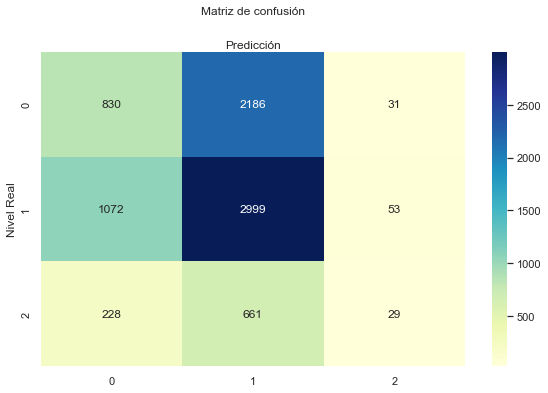

In [42]:
RF_BP_matrix = metrics.confusion_matrix(y_test, y_pred_RF_BP)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(RF_BP_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de confusión', y=1.1)
plt.ylabel('Nivel Real')
plt.xlabel('Predicción')

In [43]:
f1s = []

# Calculating f1 score for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # using average='weighted' to calculate a weighted average for the 4 classes 
    f1s.append(f1_score(y_test, pred_i, average='weighted'))

Text(0, 0.5, 'F1 Score')

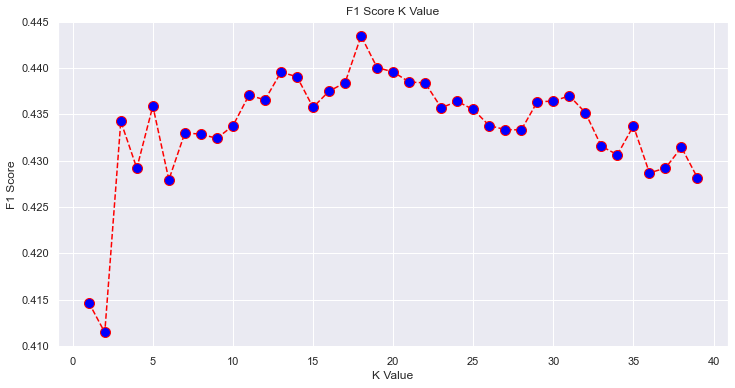

In [44]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), f1s, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

In [45]:
KNN_BP = KNeighborsClassifier(n_neighbors=14)
KNN_BP.fit(X_train, y_train)
y_pred_KNN_BP = KNN_BP.predict(X_test)

In [46]:
acc_KNN_BP = KNN_BP.score(X_test, y_test)
acc_KNN_BP = "{:.2f}".format(acc_KNN_BP)

acc_KNN_BP = KNN_BP.score(X_test, y_test)
acc_KNN_BP = "{:.2f}".format(acc_KNN_BP)

f1_KNN_BP = f1_score(y_test, y_pred_KNN_BP, average='macro')
f1_KNN_BP = "{:.2f}".format(f1_KNN_BP)

recall_KNN_BP = recall_score(y_test, y_pred_KNN_BP, average='macro')
recall_KNN_BP = "{:.2f}".format(recall_KNN_BP)

#se reinicializa el modelo para evitar over fitting
KNN_BP = KNeighborsClassifier(n_neighbors=14)
cv_KNN_BP = cross_val_score(KNN_BP, X, y, cv=5, scoring='f1_macro')
cv_KNN_BP = "{:.2f}".format(cv_KNN_BP.mean())

Text(0.5, 320.8, 'Predicción')

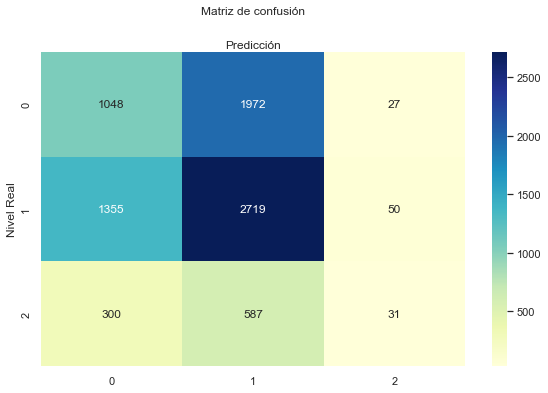

In [47]:
KNN_BP_matrix = metrics.confusion_matrix(y_test, y_pred_KNN_BP)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(KNN_BP_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de confusión', y=1.1)
plt.ylabel('Nivel Real')
plt.xlabel('Predicción')

In [48]:
resultados.loc[4]= ['RF Best Parameter', acc_RF_BP, f1_RF_BP, recall_RF_BP, cv_RF_BP]
resultados.loc[5]= ['KNN Best Parameter', acc_KNN_BP, f1_KNN_BP, recall_KNN_BP, cv_KNN_BP]

resultados

,Modelo,Accuracy,F1,Recall,Cross Validation
0,KNN,0.46,0.33,0.34,0.34
1,LR,0.51,0.23,0.33,0.22
2,SVC,0.51,0.23,0.33,0.22
3,RF,0.48,0.33,0.34,0.33
4,RF Best Parameter,0.48,0.33,0.34,0.33
5,KNN Best Parameter,0.47,0.33,0.35,0.34


La mejora de parámetros del modelo KNN da una pequeña mejora

## Balancear la muestea

In [49]:
y.value_counts()

Turno_Numero
1               13590
0               10182
2                3190
dtype: int64

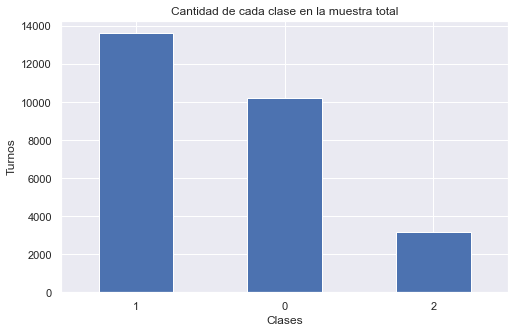

In [50]:
count_classes = pd.value_counts(y['Turno_Numero'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Cantidad de cada clase en la muestra total")
plt.xlabel("Clases")
plt.ylabel("Turnos");

In [51]:
y_train.value_counts()

Turno_Numero
1               9466
0               7135
2               2272
dtype: int64

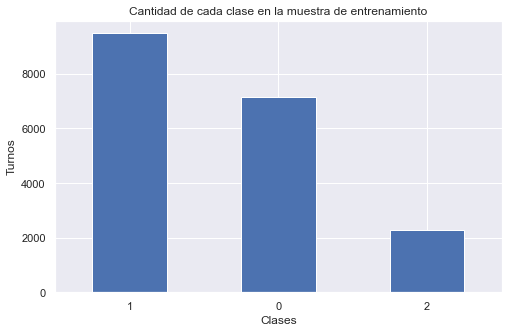

In [52]:
count_classes = pd.value_counts(y_train['Turno_Numero'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Cantidad de cada clase en la muestra de entrenamiento")
plt.xlabel("Clases")
plt.ylabel("Turnos");

In [53]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='auto')
X_over, y_over = oversample.fit_resample(X_train, y_train)
y_over['Turno_Numero'].value_counts()

0    9466
1    9466
2    9466
Name: Turno_Numero, dtype: int64

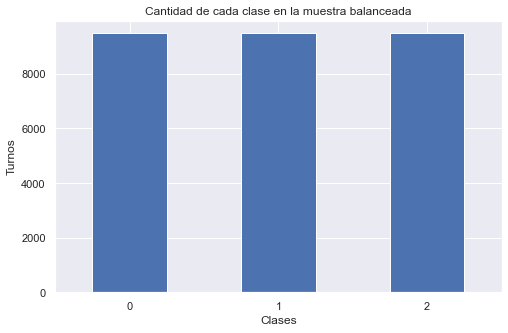

In [54]:
count_classes = pd.value_counts(y_over['Turno_Numero'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Cantidad de cada clase en la muestra balanceada")
plt.xlabel("Clases")
plt.ylabel("Turnos");

In [55]:
RF_BAL = RandomForestClassifier(random_state=42, n_estimators = 911, min_samples_split = 2, min_samples_leaf = 2, 
                               max_features = 'auto', max_depth = None, bootstrap = True)
RF_BAL.fit(X_over, y_over)
y_pred_RF_BAL = RF_BAL.predict(X_test)

In [56]:
acc_RF_BAL = RF_BAL.score(X_test, y_test)
acc_RF_BAL = "{:.2f}".format(acc_RF_BAL)

f1_RF_BAL = f1_score(y_test, y_pred_RF_BAL, average='macro')
f1_RF_BAL = "{:.2f}".format(f1_RF_BAL)

recall_RF_BAL = recall_score(y_test, y_pred_RF_BAL, average='macro')
recall_RF_BAL = "{:.2f}".format(recall_RF_BAL)

#se reinicializa el modelo para evitar over fitting
RF_BAL = RandomForestClassifier(random_state=42, n_estimators = 911, min_samples_split = 2, min_samples_leaf = 2, 
                               max_features = 'auto', max_depth = None, bootstrap = True)
cv_RF_BAL = cross_val_score(RF_BAL, X, y, cv=5, scoring='f1_macro')
cv_RF_BAL = "{:.2f}".format(cv_RF_BAL.mean())

In [57]:
KNN_BAL = KNeighborsClassifier(n_neighbors=14)
KNN_BAL.fit(X_over, y_over)
y_pred_KNN_BAL = KNN_BAL.predict(X_test)

In [58]:
acc_KNN_BAL = KNN_BAL.score(X_test, y_test)
acc_KNN_BAL = "{:.2f}".format(acc_KNN_BAL)

acc_KNN_BAL = KNN_BAL.score(X_test, y_test)
acc_KNN_BAL = "{:.2f}".format(acc_KNN_BAL)

f1_KNN_BAL = f1_score(y_test, y_pred_KNN_BAL, average='macro')
f1_KNN_BAL = "{:.2f}".format(f1_KNN_BAL)

recall_KNN_BAL = recall_score(y_test, y_pred_KNN_BAL, average='macro')
recall_KNN_BAL = "{:.2f}".format(recall_KNN_BAL)

#se reinicializa el modelo para evitar over fitting
KNN_BAL = KNeighborsClassifier(n_neighbors=14)
cv_KNN_BAL = cross_val_score(KNN_BAL, X, y, cv=5, scoring='f1_macro')
cv_KNN_BAL = "{:.2f}".format(cv_KNN_BAL.mean())

In [59]:
resultados.loc[6]= ['RF Balanced', acc_RF_BAL, f1_RF_BAL, recall_RF_BAL, cv_RF_BAL]
resultados.loc[7]= ['KNN Balanced', acc_KNN_BAL, f1_KNN_BAL, recall_KNN_BAL, cv_KNN_BAL]

resultados

,Modelo,Accuracy,F1,Recall,Cross Validation
0,KNN,0.46,0.33,0.34,0.34
1,LR,0.51,0.23,0.33,0.22
2,SVC,0.51,0.23,0.33,0.22
3,RF,0.48,0.33,0.34,0.33
4,RF Best Parameter,0.48,0.33,0.34,0.33
5,KNN Best Parameter,0.47,0.33,0.35,0.34
6,RF Balanced,0.36,0.34,0.39,0.33
7,KNN Balanced,0.46,0.37,0.36,0.34


Balacear las muestra no da resultado

## Resultado Final

In [74]:
resultados

,Modelo,Accuracy,F1,Recall,Cross Validation
0,KNN,0.46,0.33,0.34,0.34
1,LR,0.51,0.23,0.33,0.22
2,SVC,0.51,0.23,0.33,0.22
3,RF,0.48,0.33,0.34,0.33
4,RF Best Parameter,0.48,0.33,0.34,0.33
5,KNN Best Parameter,0.47,0.33,0.35,0.34
6,RF Balanced,0.36,0.34,0.39,0.33
7,KNN Balanced,0.46,0.37,0.36,0.34


# Conclusión

<div style="text-align:justify;">Los resultados obtenidos son útiles tanto para la comunidad como para los agentes cívicos en tareas de prevención de accidentes. La capacidad de prever los momentos del día en los que son más probables los accidentes puede contribuir significativamente a la planificación de medidas preventivas. Aunque se logró una precisión modesta, los modelos desarrollados proporcionan una base sólida para futuros análisis y mejoras en la predicción de accidentes en la ciudad de Barcelona.</div>